In [3]:
import  numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL as Image
from PIL import Image
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [4]:
data_dir = "E:\\tuvoc\\trafficSignal_recog\\archive(3)"
train_path="E:\\tuvoc\\trafficSignal_recog\\archive(3)\\Train"
test_path = "E:\\tuvoc\\trafficSignal_recog\\archive(3)\\Test"

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3


In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [6]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

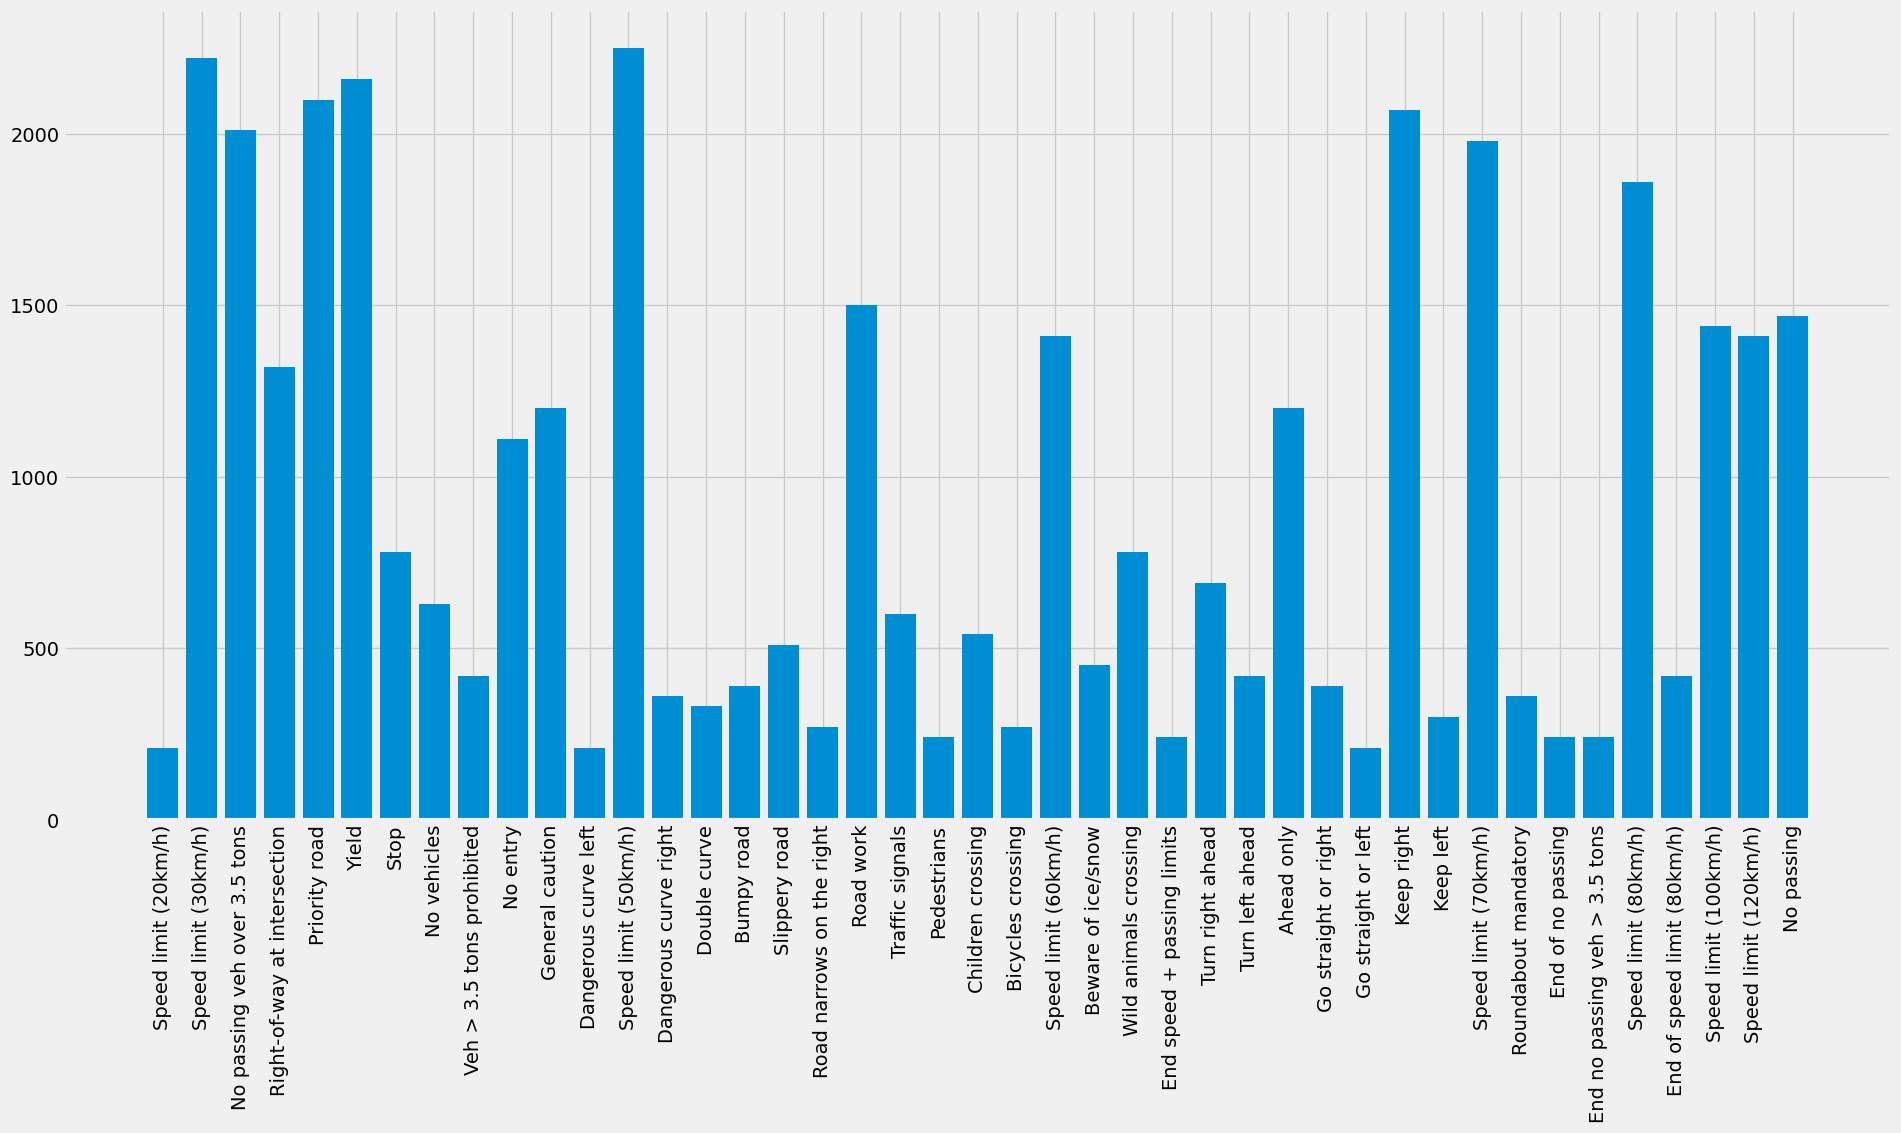

In [8]:
 ass_num, rotation='vertical')
plt.show()

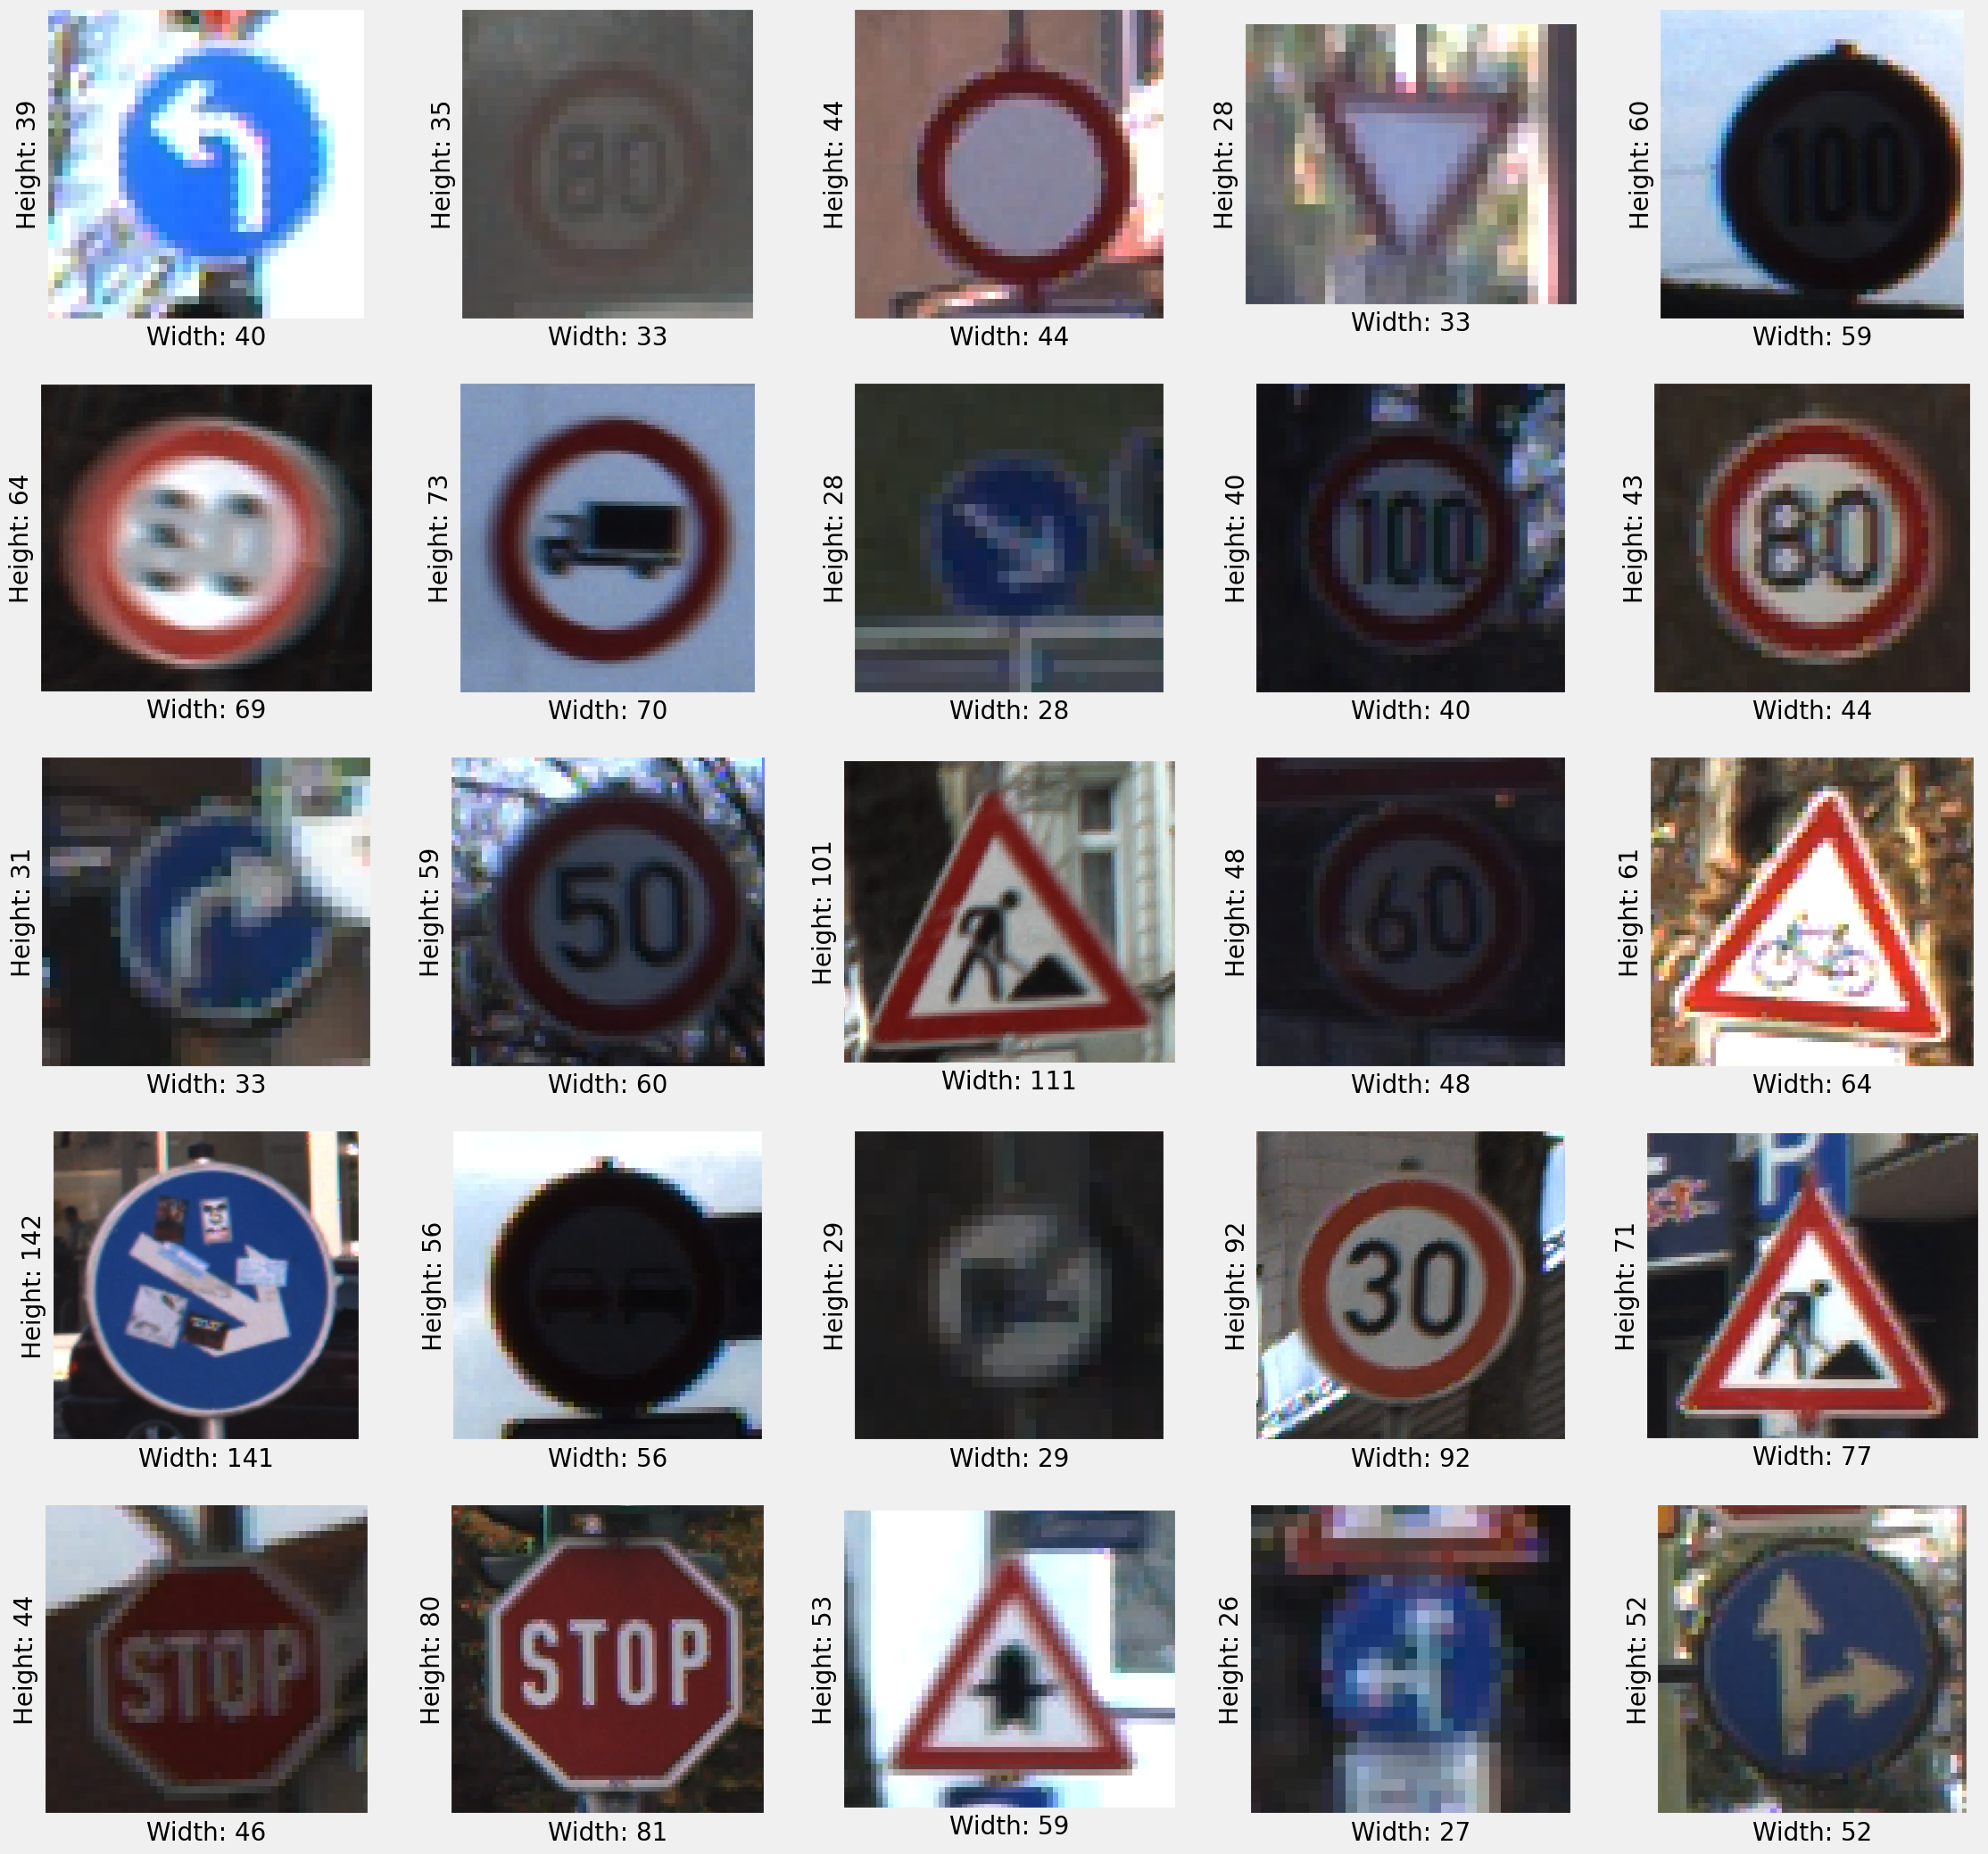

In [9]:
import random
# image file into an array

from matplotlib.image import imread
# test = pd.read_csv(data_dir + '/Test.csv')
# # print(test.head())
# print(test.columns)
# imgs = test["Path"].values
# plt.figure(figsize=(25,25))


# for i in range(1,26):
    
#     plt.subplot(5,5,i)
    
#     rand_idx = np.random.randint(len(imgs))
#     random_img_path = os.path.join(data_dir, imgs[rand_idx])  # Construct the full path
#     rand_img = imread(random_img_path)
#     plt.imshow(rand_img)
  
#     plt.grid(b=None)
   
#     plt.xlabel(rand_img.shape[1], fontsize = 20)

#     plt.ylabel(rand_img.shape[0], fontsize = 20)

# plt.show()


data_dir = "E:\\tuvoc\\trafficSignal_recog\\archive(3)"
test_path = os.path.join(data_dir, "Test")  # Adjust if necessary

# Load the CSV file containing test data
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

# Access the correct column 'Path' (not 'path')
imgs = test["Path"].values

# Plotting random images from the 'Test' folder
plt.figure(figsize=(25, 25))
for i in range(1, 26):
    # Choose a random index to get a random image path
    rand_idx = np.random.randint(len(imgs))
    random_img_path = os.path.join(data_dir, imgs[rand_idx])  # Construct the full path
    rand_img = imread(random_img_path)
    
    plt.subplot(5, 5, i)
    plt.imshow(rand_img)
    plt.grid(False)
    plt.xlabel(f'Width: {rand_img.shape[1]}', fontsize=20)
    plt.ylabel(f'Height: {rand_img.shape[0]}', fontsize=20)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [10]:
from PIL import Image
import cv2
import numpy as np


# Initialize lists to store image data and labels
image_data = []
image_labels = []

# Loop through each category
for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, 'Train', str(i))  # Path to current category
    
    # Check if directory exists and has images
    if not os.path.exists(path) or len(os.listdir(path)) == 0:
        print(f"Warning: Directory '{path}' is empty or does not exist.")
        continue

    images = os.listdir(path)  # List of image filenames in current category directory
    
    for img in images:
        try:
            # Read image using OpenCV
            image = cv2.imread(os.path.join(path, img))
            # Convert BGR to RGB
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Convert image to PIL format
            image_pil = Image.fromarray(image_rgb)
            # Resize image
            resized_image = image_pil.resize((IMG_HEIGHT, IMG_WIDTH))
            # Append resized image data and label to lists
            image_data.append(np.array(resized_image))
            image_labels.append(i)
        except Exception as e:
            print(f"Error in {img}: {e}")

# Convert lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Print shapes of image data and labels
print(image_data.shape, image_labels.shape)


(39209, 30, 30, 3) (39209,)


In [11]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels  = image_labels[shuffle_indexes]

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape" , X_train.shape)
print("X_valid.shape", X_val.shape)
print("Y_train.shape" , Y_train.shape)
print("Y_valid.shape", Y_val.shape)


X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
Y_train.shape (27446,)
Y_valid.shape (11763,)


In [13]:
y_train = keras.utils.to_categorical(Y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(Y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [14]:
aug = ImageDataGenerator(
                rotation_range=10,
                zoom_range=0.15,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.15,
                horizontal_flip=False,
                vertical_flip=False,
                fill_mode="nearest"
    
)

In [18]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(43, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/20
858/858 [==============================] - 177s 202ms/step - loss: 0.3530 - accuracy: 0.9079 - val_loss: 0.0422 - val_accuracy: 0.9894
Epoch 2/20
858/858 [==============================] - 178s 208ms/step - loss: 0.0409 - accuracy: 0.9880 - val_loss: 0.0474 - val_accuracy: 0.9872
Epoch 3/20
858/858 [==============================] - 171s 200ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.0903 - val_accuracy: 0.9747
Epoch 4/20
858/858 [==============================] - 177s 206ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0300 - val_accuracy: 0.9928
Epoch 5/20
858/858 [==============================] - 158s 184ms/step - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.0274 - val_accuracy: 0.9935
Epoch 6/20
858/858 [==============================] - 153s 178ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0560 - val_accuracy: 0.9854
Epoch 7/20
858/858 [==============================] - 154s 179ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0246 -

In [23]:
import pandas as pd
import cv2
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'model' is your trained Sequential model
# Ensure data_dir, IMG_HEIGHT, IMG_WIDTH, and NUM_CATEGORIES are correctly defined

# Load test data from CSV
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values

# Prepare test images
data = []
for img in imgs:
    try:
        image = cv2.imread(os.path.join(data_dir, img))  # Read image using OpenCV
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image_pil = Image.fromarray(image_rgb)  # Convert to PIL format
        resized_image = image_pil.resize((IMG_HEIGHT, IMG_WIDTH))  # Resize image
        data.append(np.array(resized_image))
    except Exception as e:
        print(f"Error in {img}: {e}")

# Convert list to numpy array and normalize
X_test = np.array(data)
X_test = X_test / 255.0  # Normalize pixel values to [0, 1]

# Predict using the model
pred_probs = model.predict(X_test)  # Predict probabilities for each class

# Get predicted class labels
pred = np.argmax(pred_probs, axis=1)  # Select the class with the highest probability

# Calculate accuracy
accuracy = accuracy_score(labels, pred) * 100
print('Test Data accuracy: ', accuracy)


395/395 [==============================] - 8s 19ms/step
Test Data accuracy:  96.19952494061758


In [24]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels , pred)


<Axes: >

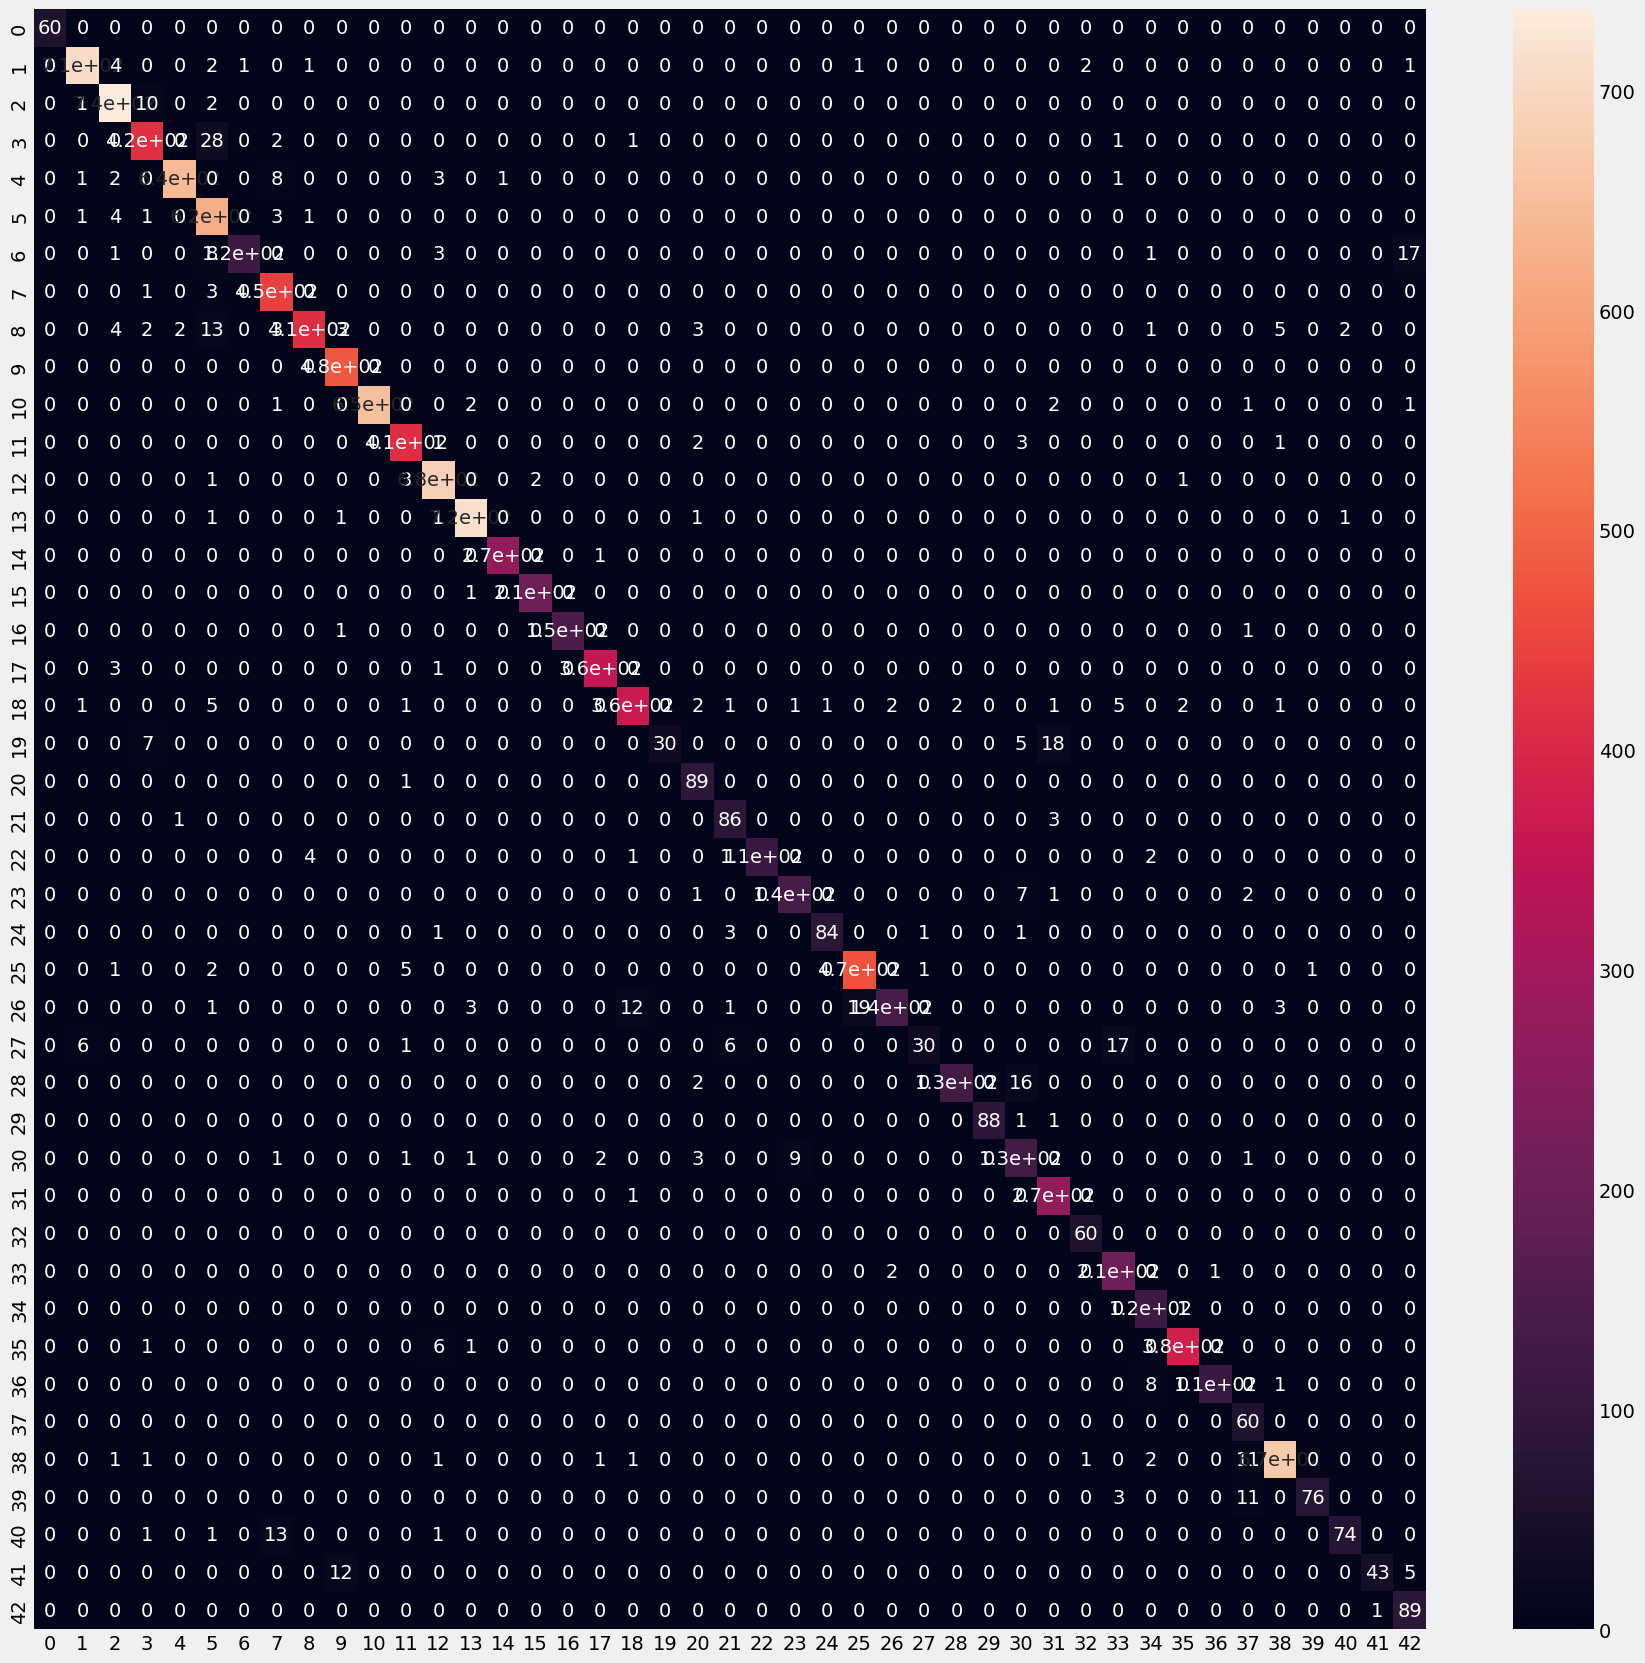

In [25]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

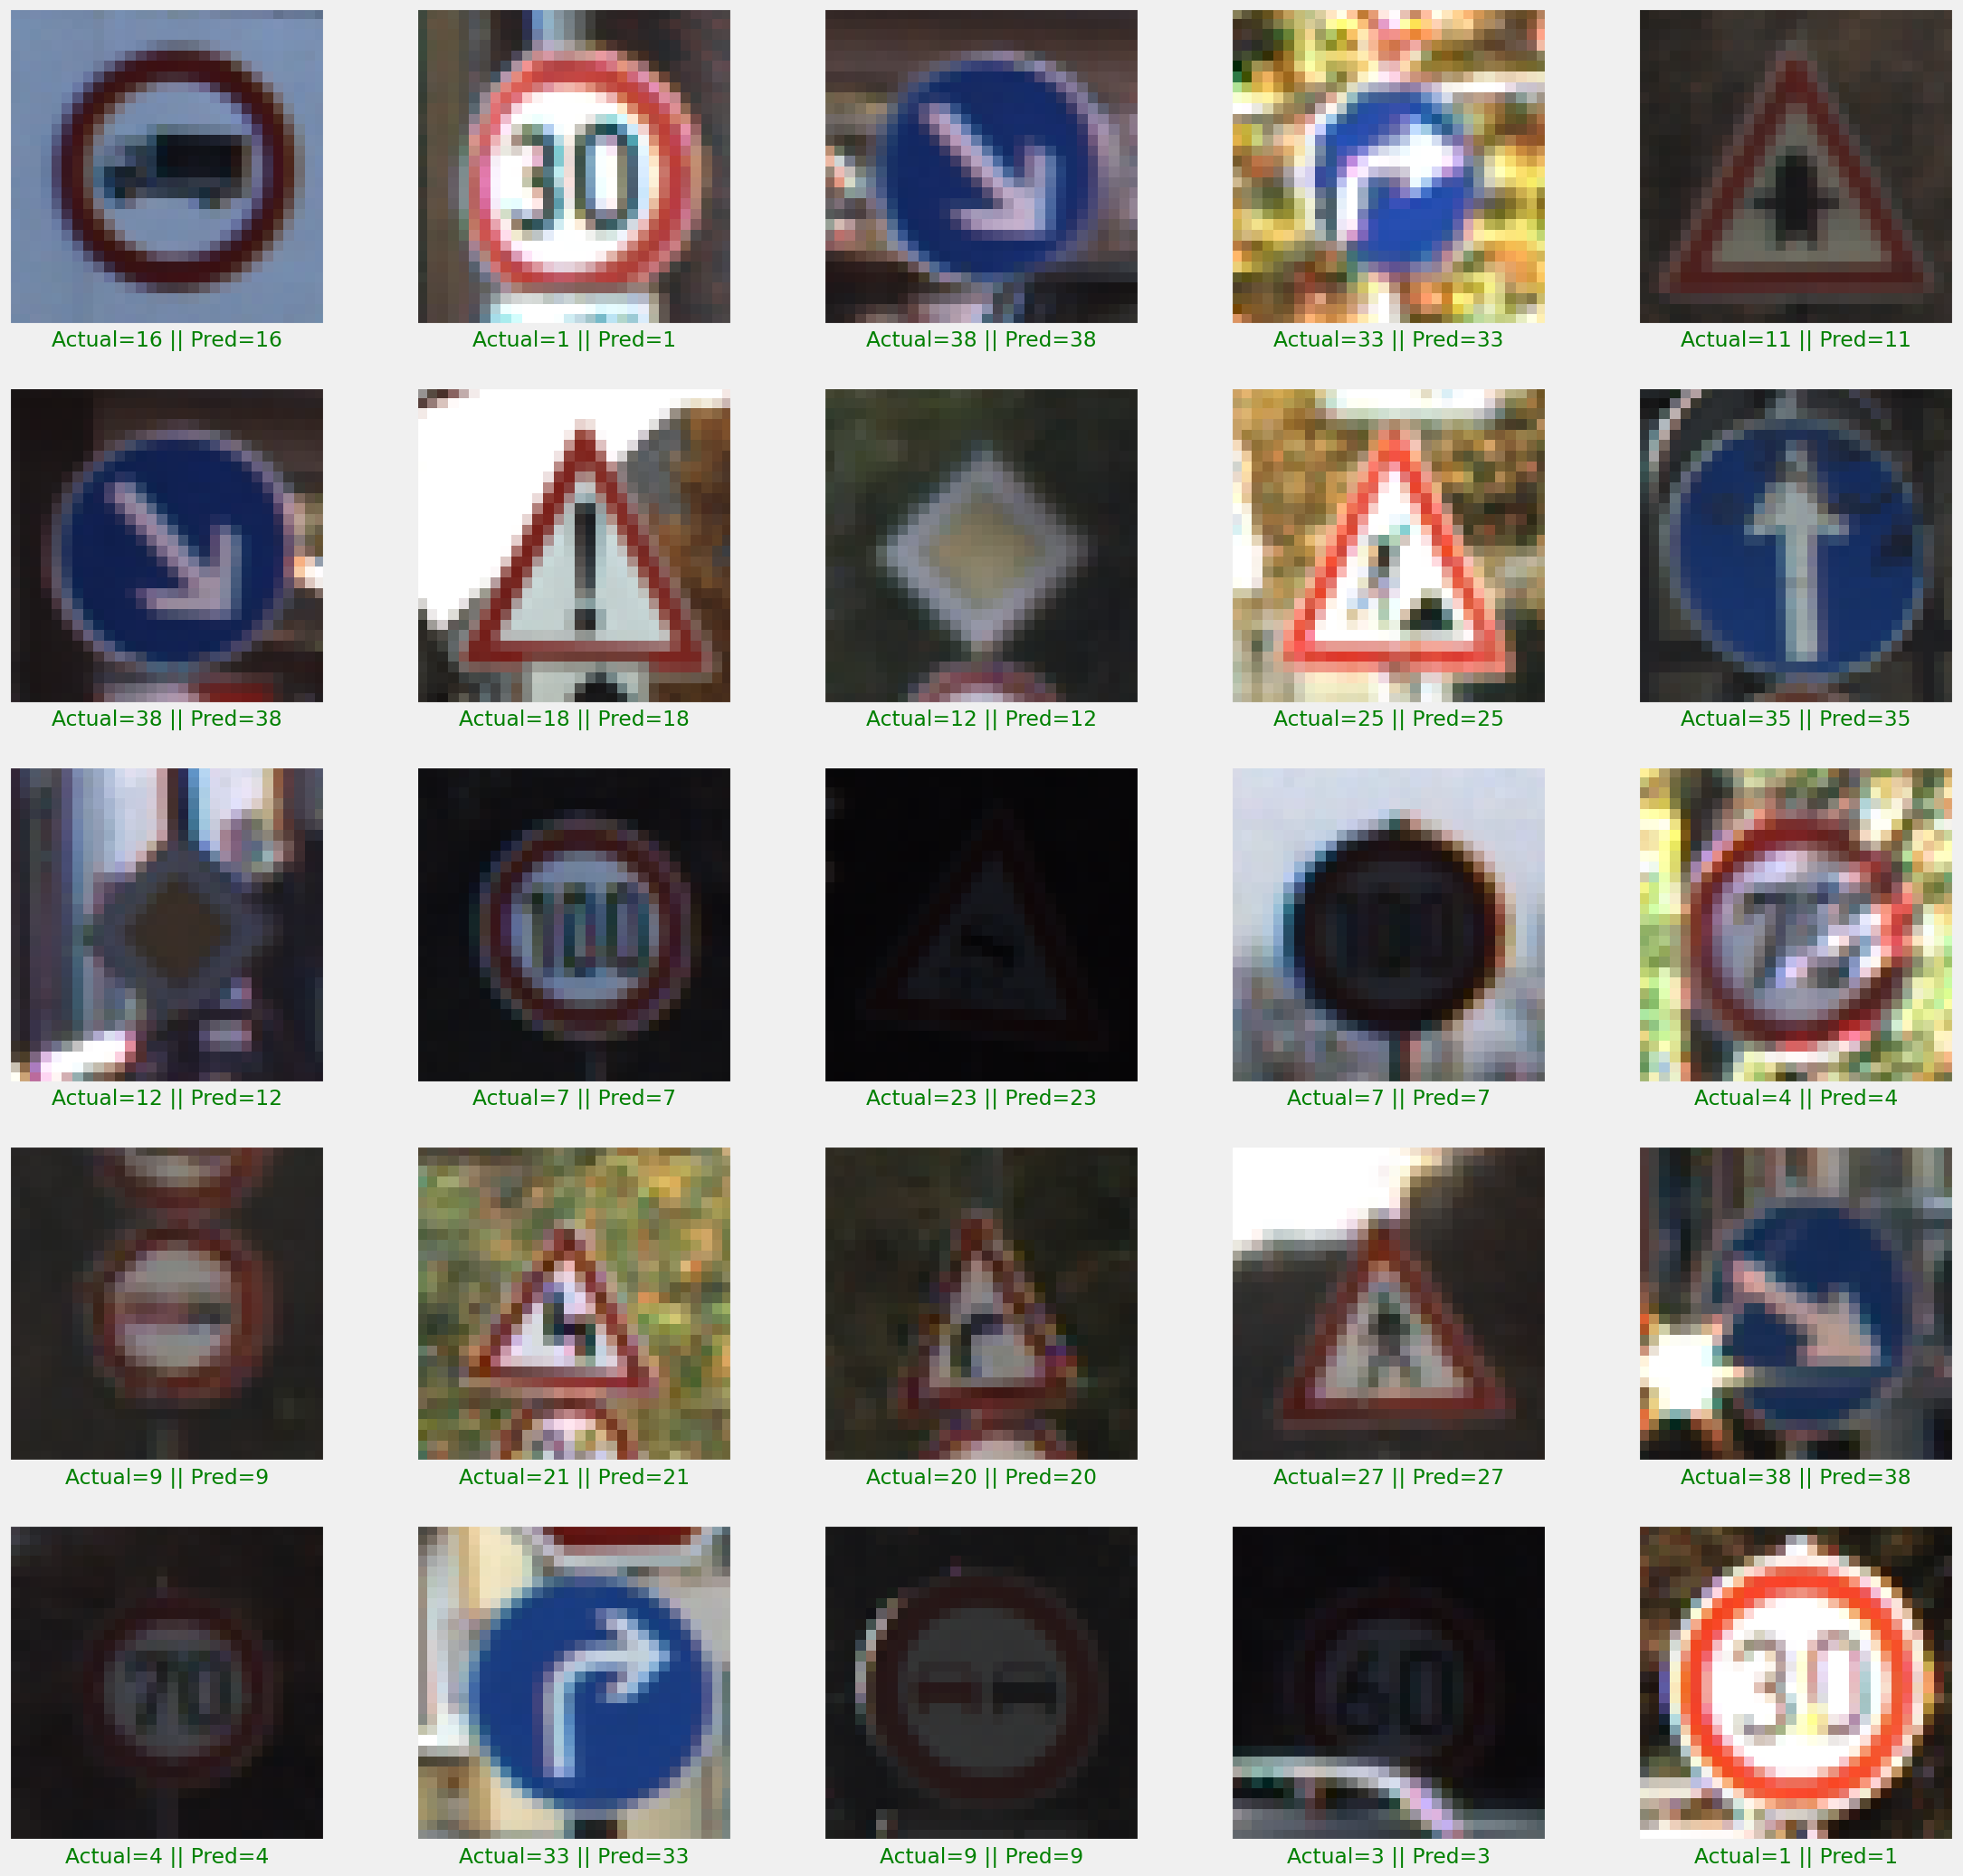

In [26]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()